#### Imports and paths setting

In [1]:
from datetime import datetime
import warnings
warnings.filterwarnings(action="ignore")
import os, sys
PACKAGE_ROOT = os.path.dirname(os.path.abspath(""))
# print(PACKAGE_ROOT)
sys.path.insert(0, PACKAGE_ROOT)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.utils import BlockChain, Node
from src.helper import prepare_data_n, create_plots_n, prepare_data_k, create_plots_k


# path for input and output folders and files
INPUT_DIR = r"C:\Users\sharm\Documents\workspace\gitworks\basic-blockchain\inputs"
OUTPUT_DIR = r"C:\Users\sharm\Documents\workspace\gitworks\basic-blockchain\outputs"
INPUT_FILE_PATH = os.path.join(INPUT_DIR, "input.txt")
OUTPUT_FILE_PATH = os.path.join(OUTPUT_DIR, "output.txt")

c:\Users\sharm\Documents\workspace\gitworks\basic-blockchain


### PART 1
Below code reads the input parameters from the file stored at INPUT_FILE_PATH.

After reading params, it runs the steps given in 'Procedure' section of assignment.

The logs are created and shown in console as well as in outputs.txt file.

For below code purpose, n=10, m=10, k=4.

You can change these params from inputs/input.txt file.

In [2]:
NONCE_MAX_VALUE = 2**16
# initialize the block chain and create a genesis block
blockchain = BlockChain(NONCE_MAX_VALUE)
# read inputs from a file
with open(INPUT_FILE_PATH, "r") as fr:
    content = [int(num) for num in fr.readline().strip().split()]
    n, m, k = content

with open(OUTPUT_FILE_PATH, "w") as fw:
    nodes = [Node(blockchain, i+1) for i in range(n)]
    block_proposers = {"round": [], "process": [], "block": []}
    for round in range(m):
        print(f"Round {round+1}: ")
        fw.write(f"Round {round+1}: \n")
        for idx, node in enumerate(nodes):
            res = node.propose_block(f"Node id: {node.id}", k, NONCE_MAX_VALUE)
            if res:
                block_proposers["round"].append(round+1)
                block_proposers["process"].append(idx+1)
                block_proposers["block"].append(blockchain.chain[-1])
                print(f"Process: {idx+1}")
                fw.write(f"Process: {idx+1}\n")
                print("Block: ")
                fw.write("Block: \n")
                print("-"*10)
                fw.write("-"*10 + "\n")
                print("-"*10)
                fw.write("-"*10 + "\n")
                print(".".center(10, " "))
                fw.write(".".center(10, " ") + "\n")
                print(".".center(10, " "))
                fw.write(".".center(10, " ") + "\n")
                print(".".center(10, " "))
                fw.write(".".center(10, " ") + "\n")
                print(f"Nonce: {blockchain.chain[-1].nonce}")
                fw.write(f"Nonce: {blockchain.chain[-1].nonce}\n")
                print(f"Timestamp: {blockchain.chain[-1].current_timestamp}")
                fw.write(f"Timestamp: {blockchain.chain[-1].current_timestamp}\n")
                print(".".center(10, " "))
                fw.write(".".center(10, " ") + "\n")
                print(".".center(10, " "))
                fw.write(".".center(10, " ") + "\n")
                print(".".center(10, " "))
                fw.write(".".center(10, " ") + "\n")
                print("-"*10)
                fw.write("-"*10 + "\n")
                print("-"*10)
                fw.write("-"*10 + "\n")

Round 1: 
Process: 1
Block: 
----------
----------
    .     
    .     
    .     
Nonce: 60
Timestamp: 2023-04-19 12:36:22.847982
    .     
    .     
    .     
----------
----------
Process: 3
Block: 
----------
----------
    .     
    .     
    .     
Nonce: 6075
Timestamp: 2023-04-19 12:36:22.968533
    .     
    .     
    .     
----------
----------
Process: 4
Block: 
----------
----------
    .     
    .     
    .     
Nonce: 36280
Timestamp: 2023-04-19 12:36:22.984562
    .     
    .     
    .     
----------
----------
Process: 5
Block: 
----------
----------
    .     
    .     
    .     
Nonce: 15030
Timestamp: 2023-04-19 12:36:23.049045
    .     
    .     
    .     
----------
----------
Process: 6
Block: 
----------
----------
    .     
    .     
    .     
Nonce: 48335
Timestamp: 2023-04-19 12:36:23.097843
    .     
    .     
    .     
----------
----------
Process: 8
Block: 
----------
----------
    .     
    .     
    .     
Nonce: 25676
Timesta

### PART 2

#### 2.a
Below code runs the experiment where it changes the number of nodes (n) to observe the impact of n on the count of proposers.

Below is the code where we vary number of nodes n, keeping k fixed. 

The code runs for 'n' = {5, 10, 15, ..., 100}, keeping 'k' fixed at 4 for 10 rounds each.

In [4]:
# EXPERIMENT 1 - VARY THE NUMBER OF NODES IN THE SYSTEM KEEPING k FIXED
# nonce value upper limit 
NONCE_MAX_VALUE = 2**16
# generate different number of nodes
Ns = np.arange(start=5, stop=101, step=5)
# number of rounds
m = 10
# difficulty param
k = 4
# initialize as dict to make dataframe later
block_proposers = {"n": [], "round": [], "process": [], "block": [], "k": []}
# main loop
file_name = "part2_vary_n_op_file" + str(datetime.now()).replace(" ", "-").replace(":","-").split(".")[0] + ".txt"
# print(file_name)
part2_vary_n_op_file_path = os.path.join(OUTPUT_DIR, file_name)
with open(part2_vary_n_op_file_path, "w") as fw:
    for n in Ns:
        blockchain = BlockChain(NONCE_MAX_VALUE)
        print(f"n: {n}")
        fw.write(f"n: {n}\n")
        nodes = [Node(blockchain, i+1) for i in range(n)]
        for round in range(m):
            print(f"Round {round+1}: ")
            fw.write(f"Round {round+1}: \n")
            for idx, node in enumerate(nodes):
                # tic = time.time()
                res = node.propose_block(f"Node id: {node.id}", k, NONCE_MAX_VALUE)
                # print(f"Time taken: {time.time() - tic} seconds")
                if res:
                    # block_proposers["round"].append((round+1, idx+1, blockchain.chain[-1]))
                    block_proposers["round"].append(round+1)
                    block_proposers["process"].append(idx+1)
                    block_proposers["block"].append(blockchain.chain[-1])
                    block_proposers["n"].append(n)
                    block_proposers["k"].append(k)
                    print(f"Process: {idx+1}")
                    fw.write(f"Process: {idx+1}\n")
                    # print("Block: ")
                    fw.write("Block: \n")
                    # print("-"*10)
                    fw.write("-"*10 + "\n")
                    # print("-"*10)
                    fw.write("-"*10 + "\n")
                    # print(".".center(10, " "))
                    fw.write(".".center(10, " ") + "\n")
                    # print(".".center(10, " "))
                    fw.write(".".center(10, " ") + "\n")
                    # print(".".center(10, " "))
                    fw.write(".".center(10, " ") + "\n")
                    # print(f"Nonce: {blockchain.chain[-1].nonce}")
                    fw.write(f"Nonce: {blockchain.chain[-1].nonce}\n")
                    # print(f"Timestamp: {blockchain.chain[-1].current_timestamp}")
                    fw.write(f"Timestamp: {blockchain.chain[-1].current_timestamp}\n")
                    # print(".".center(10, " "))
                    fw.write(".".center(10, " ") + "\n")
                    # print(".".center(10, " "))
                    fw.write(".".center(10, " ") + "\n")
                    # print(".".center(10, " "))
                    fw.write(".".center(10, " ") + "\n")
                    # print("-"*10)
                    fw.write("-"*10 + "\n")
                    # print("-"*10)
                    fw.write("-"*10 + "\n")

n: 5
Round 1: 
Process: 1
Process: 3
Process: 4
Process: 5
Round 2: 
Process: 1
Process: 2
Process: 5
Round 3: 
Process: 1
Process: 2
Process: 3
Round 4: 
Process: 1
Process: 2
Round 5: 
Process: 1
Process: 3
Round 6: 
Process: 1
Process: 3
Process: 4
Process: 5
Round 7: 
Process: 1
Process: 3
Process: 4
Process: 5
Round 8: 
Process: 1
Process: 2
Process: 3
Process: 4
Process: 5
Round 9: 
Process: 2
Round 10: 
Process: 2
Process: 3
Process: 4
n: 10
Round 1: 
Process: 1
Process: 3
Process: 4
Process: 5
Process: 6
Process: 8
Process: 9
Round 2: 
Process: 2
Process: 4
Process: 6
Process: 7
Process: 8
Process: 9
Round 3: 
Process: 2
Process: 4
Process: 5
Process: 6
Process: 8
Round 4: 
Process: 1
Process: 2
Process: 4
Process: 5
Process: 9
Round 5: 
Process: 1
Process: 3
Process: 4
Process: 8
Process: 9
Round 6: 
Process: 3
Process: 6
Process: 9
Process: 10
Round 7: 
Process: 3
Process: 4
Process: 5
Process: 7
Process: 10
Round 8: 
Process: 1
Process: 4
Process: 5
Process: 6
Round 9: 
Proc

In [5]:
# # Save the details of block proposers in csv format
# bp_df = pd.DataFrame(block_proposers)[["n", "k", "round", "process"]]
# file_name = "part2a_vary_n_" + str(datetime.now()).replace(" ", "-").replace(":","-") + ".csv"
# bp_df.to_csv(os.path.join(OUTPUT_DIR, file_name), index=False)

##### 2.a Create plots

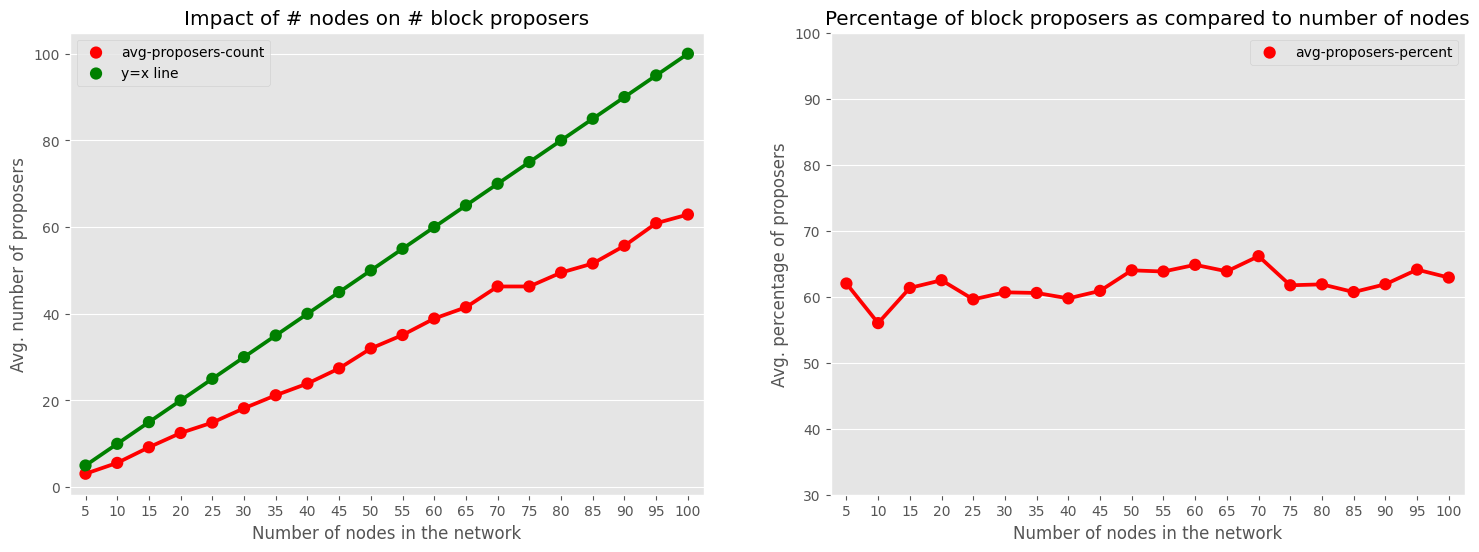

In [6]:
file_path = r"C:\Users\sharm\Documents\workspace\gitworks\basic-blockchain\outputs\part2a_vary_n_2023-04-19-12-51-28.873671.csv"
tmp_df2 = prepare_data_n(file_path)
create_plots_n(tmp_df2)

##### 2.a Observations
1. We observe that as we increase the number of nodes, block proposers count also increases, almost linearly. But this increase is slower than y=x line (left figure). 

2. We also observe that the percentage of block proposers fluctuate nearby 60% as we change number of nodes 'n'. But it does not change drastically.

### 2.b

Below code changes the value of k (difficulty parameter) to see the impact on the number of proposers block in the network.

We are varying k = {2, 4, 6, 8, 10}, keeping n = 10 and rounds = 10

In [8]:
# EXPERIMENT 2 - VARY THE VALUES OF k, KEEPING n, m FIXED.
# nonce value set for this experiment
NONCE_MAX_VALUE = 2**24
# Vary the difficulty by varying the value of k
Ks = np.arange(start=2, stop=11, step=2)
# rounds
m = 10
# number of nodes
n = 10
file_name = "part2b_vary_k_op_file_" + str(datetime.now()).replace(" ", "-").replace(":","-").split(".")[0] + ".txt"
part2b_vary_k_op_file_path = os.path.join(OUTPUT_DIR, file_name)
# initialize as dict to make dataframe later
block_proposers = {"n": [], "round": [], "process": [], "block": [], "k": []}
with open(part2b_vary_k_op_file_path, "w") as fw:
    for k in Ks:
        blockchain = BlockChain(NONCE_MAX_VALUE)
        print(f"k: {k}")
        fw.write(f"k: {k}\n")
        nodes = [Node(blockchain, i+1) for i in range(n)]
        for round in range(m):
            print(f"Round {round+1}: ")
            fw.write(f"Round {round+1}: \n")
            for idx, node in enumerate(nodes):
                res = node.propose_block(f"Node id: {node.id}", k, NONCE_MAX_VALUE)
                if res:
                    block_proposers["round"].append(round+1)
                    block_proposers["process"].append(idx+1)
                    block_proposers["block"].append(blockchain.chain[-1])
                    block_proposers["n"].append(n)
                    block_proposers["k"].append(k)
                    print(f"Process: {idx+1}")
                    fw.write(f"Process: {idx+1}\n")
                    # print("Block: ")
                    fw.write("Block: \n")
                    # print("-"*10)
                    fw.write("-"*10 + "\n")
                    # print("-"*10)
                    fw.write("-"*10 + "\n")
                    # print(".".center(10, " "))
                    fw.write(".".center(10, " ") + "\n")
                    # print(".".center(10, " "))
                    fw.write(".".center(10, " ") + "\n")
                    # print(".".center(10, " "))
                    fw.write(".".center(10, " ") + "\n")
                    # print(f"Nonce: {blockchain.chain[-1].nonce}")
                    fw.write(f"Nonce: {blockchain.chain[-1].nonce}\n")
                    # print(f"Timestamp: {blockchain.chain[-1].current_timestamp}")
                    fw.write(f"Timestamp: {blockchain.chain[-1].current_timestamp}\n")
                    # print(".".center(10, " "))
                    fw.write(".".center(10, " ") + "\n")
                    # print(".".center(10, " "))
                    fw.write(".".center(10, " ") + "\n")
                    # print(".".center(10, " "))
                    fw.write(".".center(10, " ") + "\n")
                    # print("-"*10)
                    fw.write("-"*10 + "\n")
                    # print("-"*10)
                    fw.write("-"*10 + "\n")

k: 2
Round 1: 
Process: 1
Process: 2
Process: 3
Process: 4
Process: 5
Process: 6
Process: 7
Process: 8
Process: 9
Process: 10
Round 2: 
Process: 1
Process: 2
Process: 3
Process: 4
Process: 5
Process: 6
Process: 7
Process: 8
Process: 9
Process: 10
Round 3: 
Process: 1
Process: 2
Process: 3
Process: 4
Process: 5
Process: 6
Process: 7
Process: 8
Process: 9
Process: 10
Round 4: 
Process: 1
Process: 2
Process: 3
Process: 4
Process: 5
Process: 6
Process: 7
Process: 8
Process: 9
Process: 10
Round 5: 
Process: 1
Process: 2
Process: 3
Process: 4
Process: 5
Process: 6
Process: 7
Process: 8
Process: 9
Process: 10
Round 6: 
Process: 1
Process: 2
Process: 3
Process: 4
Process: 5
Process: 6
Process: 7
Process: 8
Process: 9
Process: 10
Round 7: 
Process: 1
Process: 2
Process: 3
Process: 4
Process: 5
Process: 6
Process: 7
Process: 8
Process: 9
Process: 10
Round 8: 
Process: 1
Process: 2
Process: 3
Process: 4
Process: 5
Process: 6
Process: 7
Process: 8
Process: 9
Process: 10
Round 9: 
Process: 1
Proces

In [9]:
# Save block proposer details into a dataframe for part2b
bp_df = pd.DataFrame(block_proposers)[["n", "k", "round", "process"]]
file_name = "part2b_vary_k_" + str(datetime.now()).replace(" ", "-").replace(":","-") + ".csv"
bp_df.to_csv(os.path.join(OUTPUT_DIR, file_name), index=False)
bp_df.head(2)

,n,k,round,process
0,10,2,1,1
1,10,2,1,2


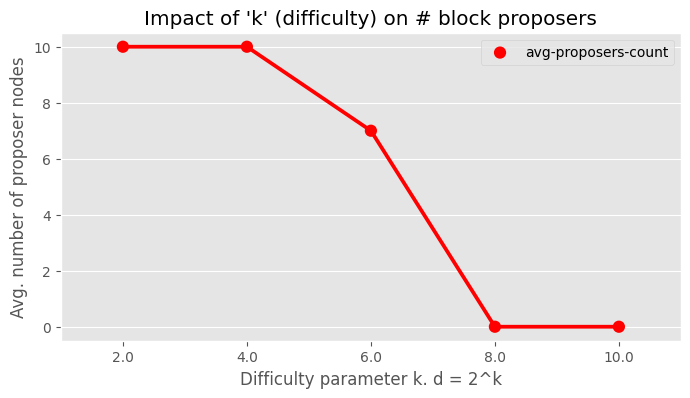

In [10]:
# file_path for the casv file generated above
# look for csv file with part2b_vary_k* name pattern
file_path = r"C:\Users\sharm\Documents\workspace\gitworks\basic-blockchain\outputs\part2b_vary_k_2023-04-19-15-20-42.836771.csv"
tmp_df2 = prepare_data_k(file_path)
Ks = np.arange(start=2, stop=11, step=2)
remaining_ks = set(Ks).difference(tmp_df2.k.unique())
for k in remaining_ks:
    record = {
        "n": 10, 
        "k": k, 
        "avg_propose_count": 0.0, 
        "percent_proposers": 0.0
    }
    tmp_df2 = tmp_df2.append(record, ignore_index=True)

create_plots_k(tmp_df2)

#### 2.b Observations
We observe that as we increase 'k' (difficulty param.), the number of block proposers gets reduce.

In fact, for k=8 and k=10, we could not find any block proposers with given limit of nonce variable.